# Machine Learning (Mini Project) :-
## Medical Insurance Cost Prediction :

In [1]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import sklearn
%matplotlib inline

In [2]:
df = pd.read_csv("C:\\Users\\admin\\Documents\\My Tableau Repository\\Datasources\\insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
df.describe(include='object')

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


In [6]:
df.duplicated().sum()

1

In [7]:
df.drop_duplicates()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [9]:
df['sex'].value_counts()

male      676
female    662
Name: sex, dtype: int64

In [10]:
df['region'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

In [11]:
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

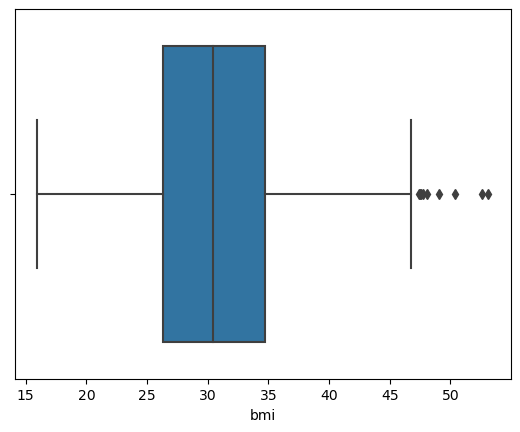

In [12]:
sb.boxplot(df['bmi'])

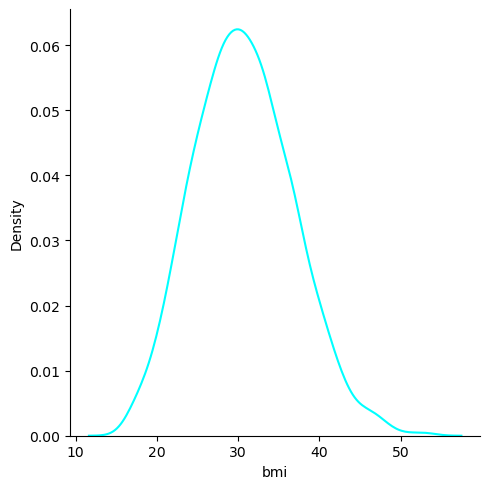

In [13]:
sb.displot(df['bmi'],kind='kde',color='cyan')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges'>

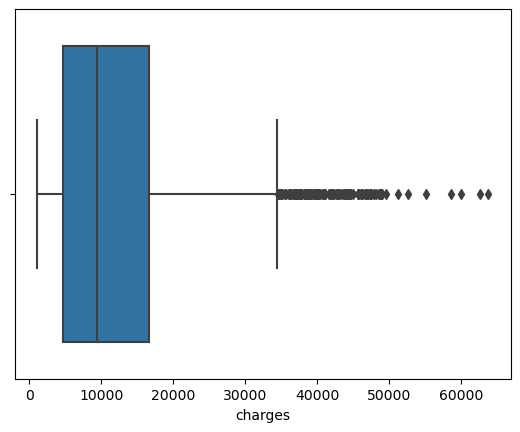

In [14]:
sb.boxplot(df['charges'])

# Clearing the outlairs from the column bmi

In [15]:
meanA = df['bmi'].mean()
Q1 = np.percentile(df['bmi'],25)
Q2 = np.median(df['bmi'])
Q3 = np.percentile(df['bmi'],75)
IQR = Q3-Q1
lower_fence = Q1-(1.5*IQR)
upper_fence = Q3+(1.5*IQR)

print('The lower fence is = '+str(lower_fence))
print('The upper fence is = '+str(upper_fence))

The lower fence is = 13.7
The upper fence is = 47.290000000000006


In [16]:
df2 = df.loc[df['bmi']<=upper_fence]
df1= df2.loc[df2['bmi']>=lower_fence]

In [17]:
df1

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

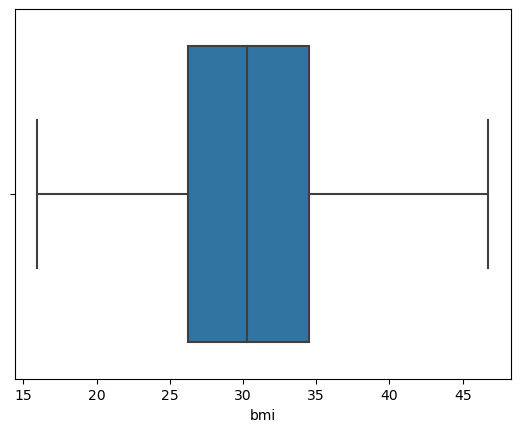

In [18]:
sb.boxplot(df1['bmi'])

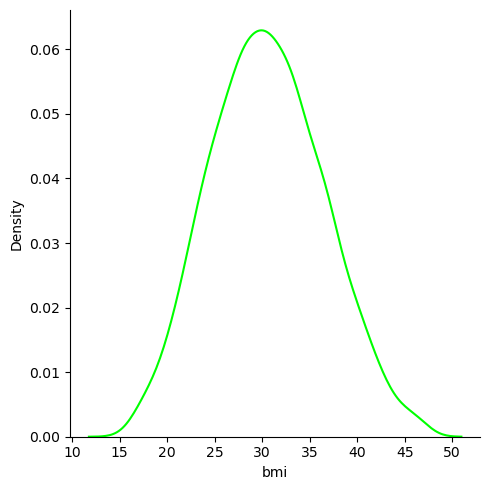

In [19]:
sb.displot(df1['bmi'],kind='kde',color='lime')

In [20]:
df1.replace({'smoker':{'yes':1,'no':0}},inplace=True)

In [21]:
df1.replace({'region':{'southeast':0,'southwest':1,'northwest':2,'northeast':3}},inplace=True)

In [22]:
df1.replace({'sex':{'male':1,'female':0}},inplace=True)

In [23]:
df1

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,1,16884.92400
1,18,1,33.770,1,0,0,1725.55230
2,28,1,33.000,3,0,0,4449.46200
3,33,1,22.705,0,0,2,21984.47061
4,32,1,28.880,0,0,2,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2,10600.54830
1334,18,0,31.920,0,0,3,2205.98080
1335,18,0,36.850,0,0,0,1629.83350
1336,21,0,25.800,0,0,1,2007.94500


In [24]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [25]:
v=df1.drop(['charges'],axis=1)
vif=pd.DataFrame()
vif['columns']=v.columns
vif['vif_value']=[variance_inflation_factor(v.values,r)
                 for r in range(len(v.columns))]
vif

,columns,vif_value
0,age,7.966322
1,sex,2.004391
2,bmi,9.134219
3,children,1.806619
4,smoker,1.255531
5,region,2.387039


In [26]:
'''It appears that the values of column['bmi'] & column['age'] is hight , but as they both are important so no one can be removed '''

"It appears that the values of column['bmi'] & column['age'] is hight , but as they both are important so no one can be removed "

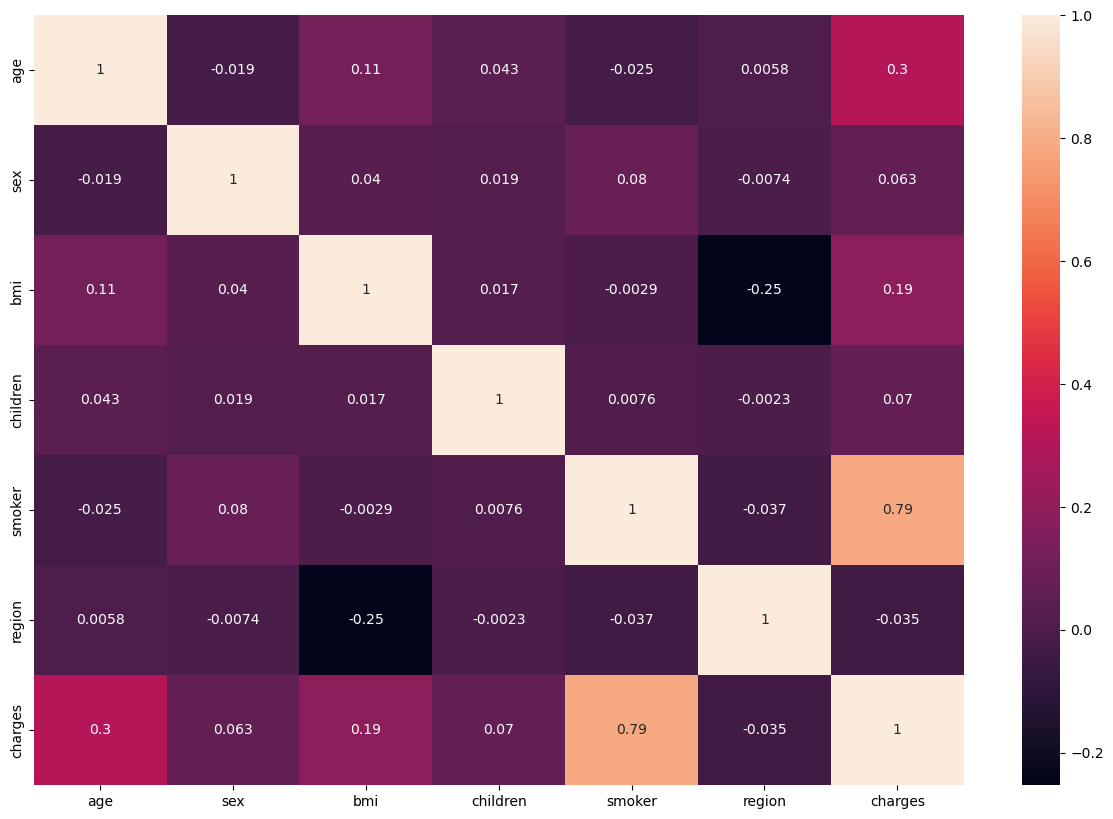

In [27]:
plt.figure(figsize=(15,10))
sb.heatmap(df1.corr(),annot=True)
plt.show()

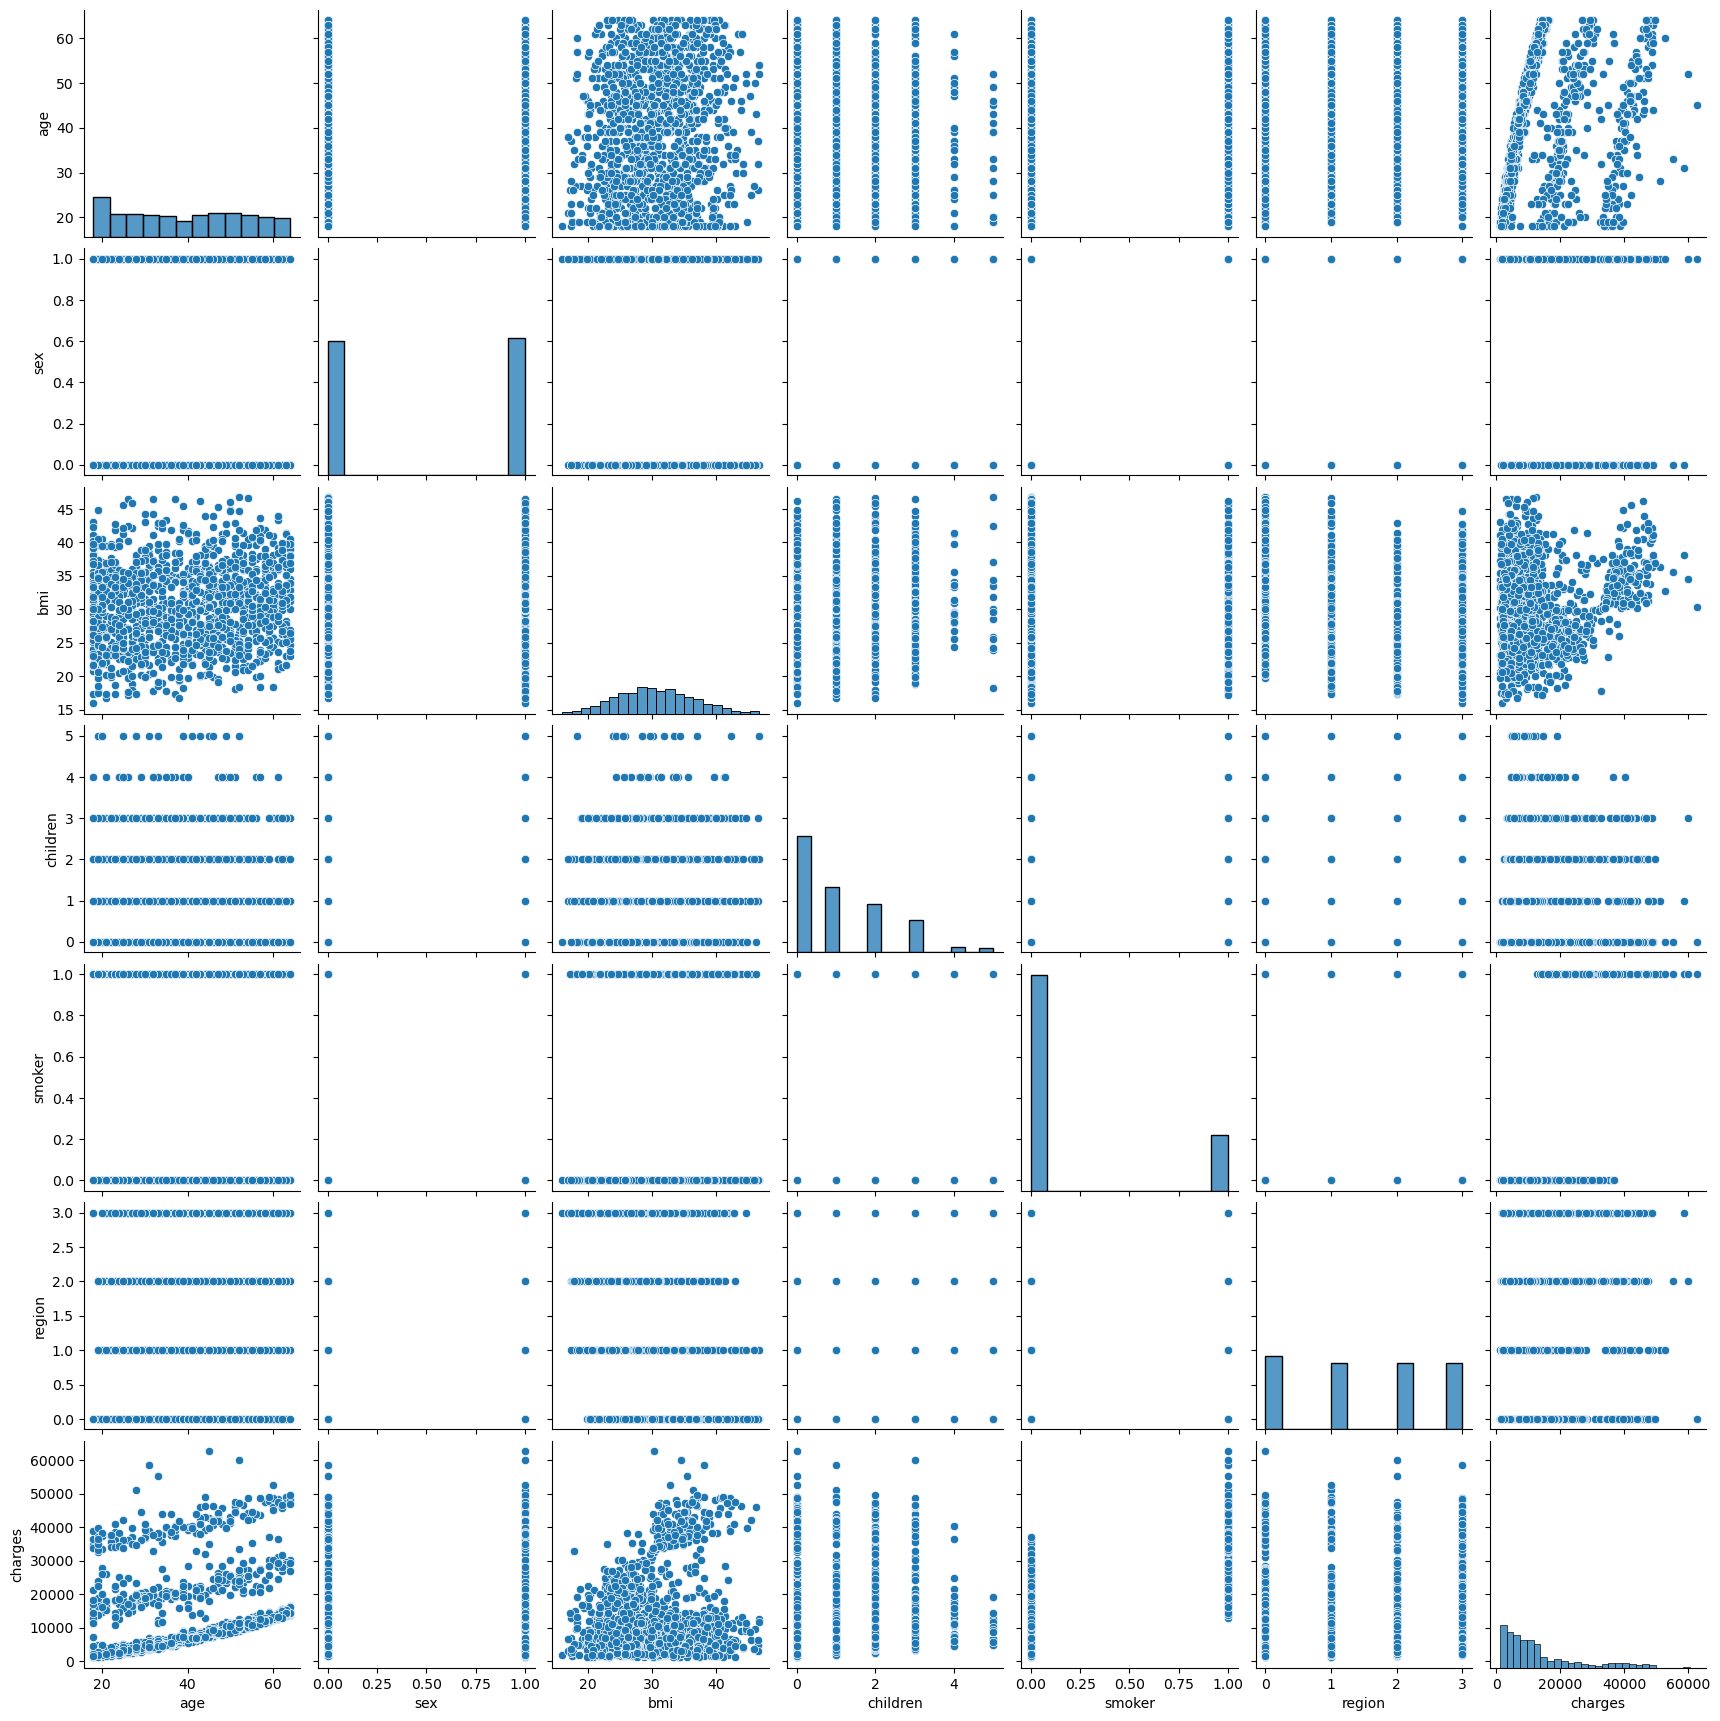

In [28]:
sb.pairplot(df1)

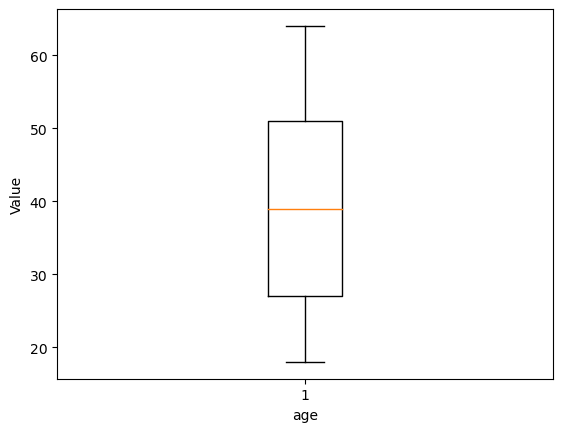

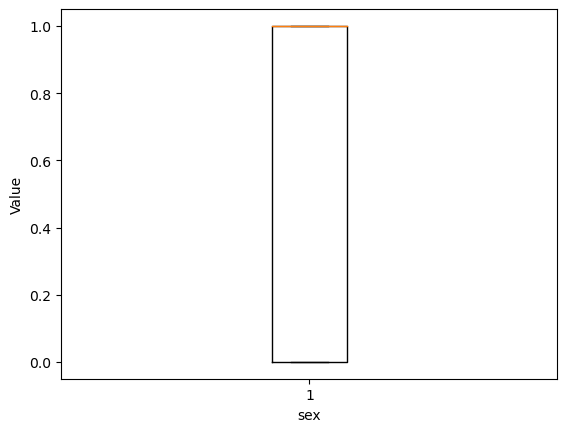

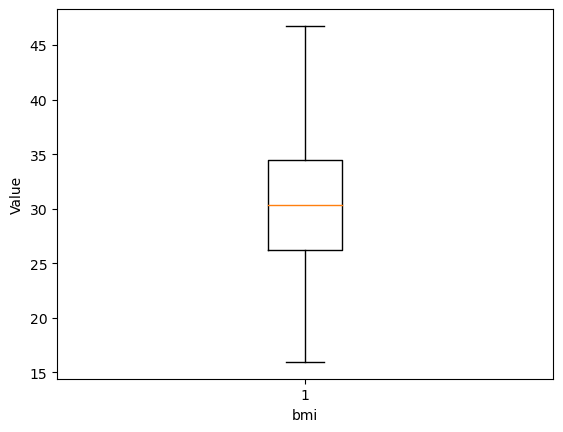

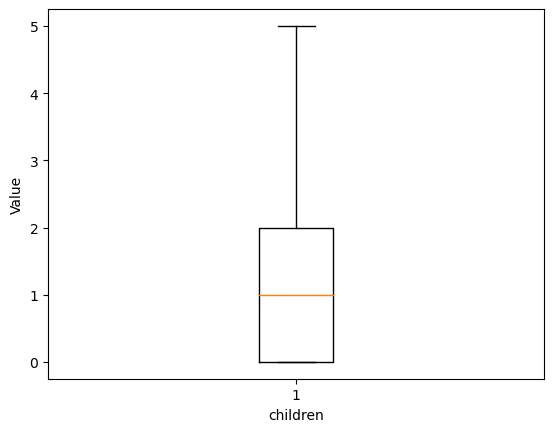

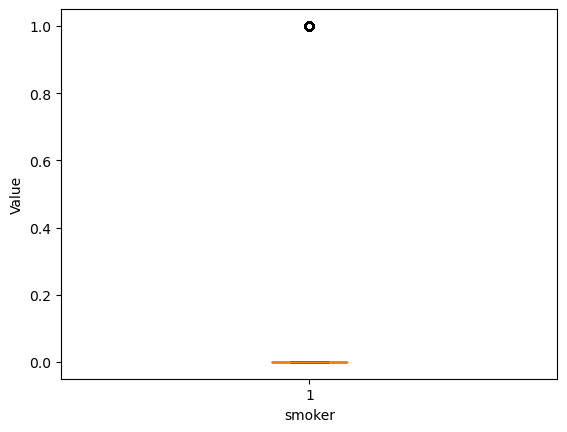

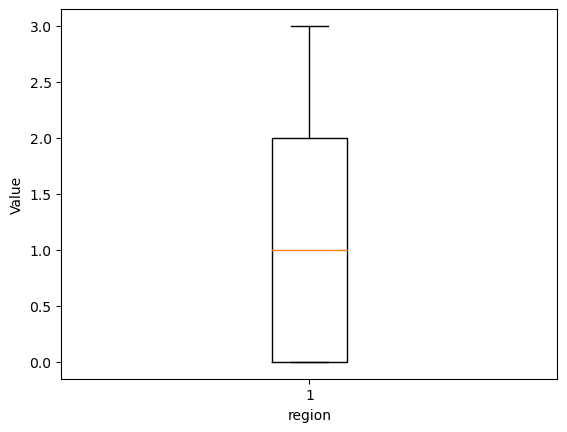

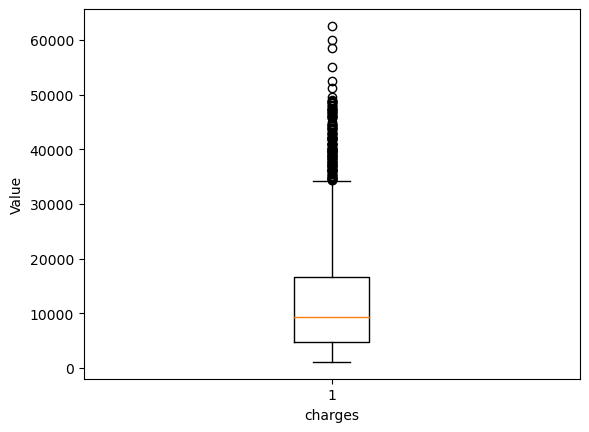

In [29]:
for i in df1.columns:
    plt.boxplot(df1[i])
    plt.xlabel(i)
    plt.ylabel('Value')
    plt.show()

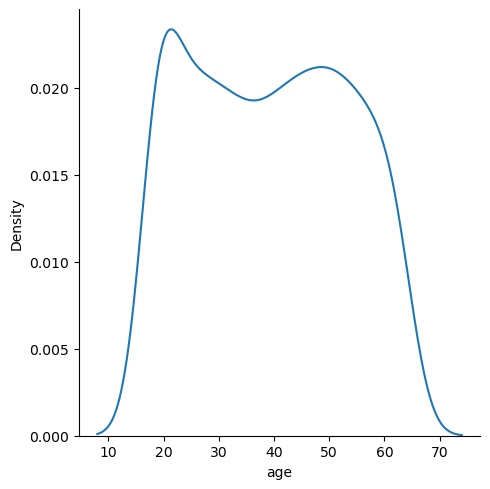

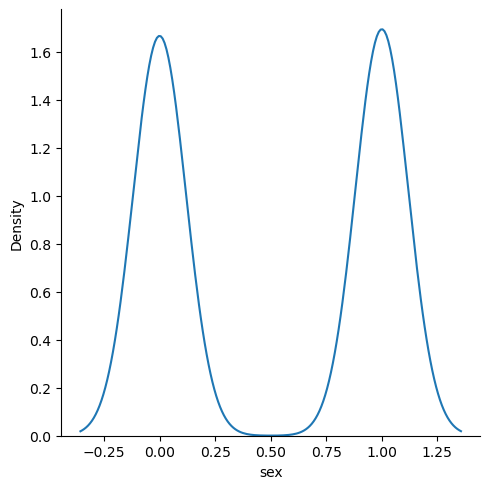

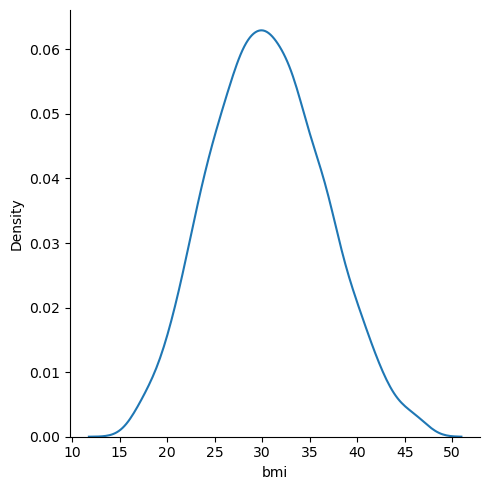

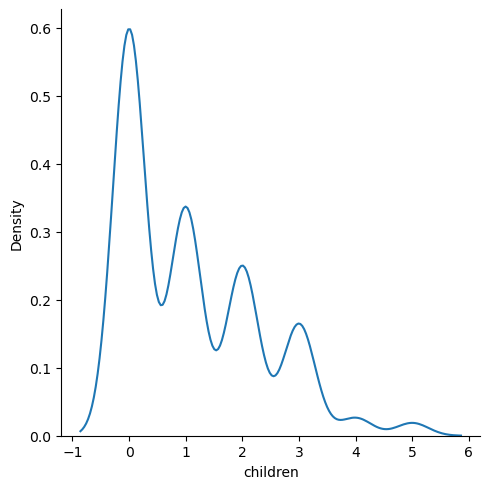

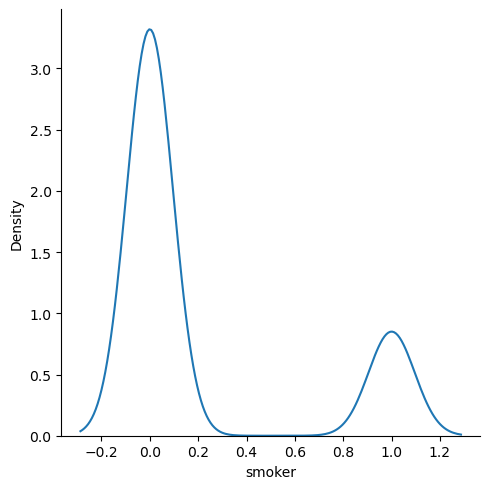

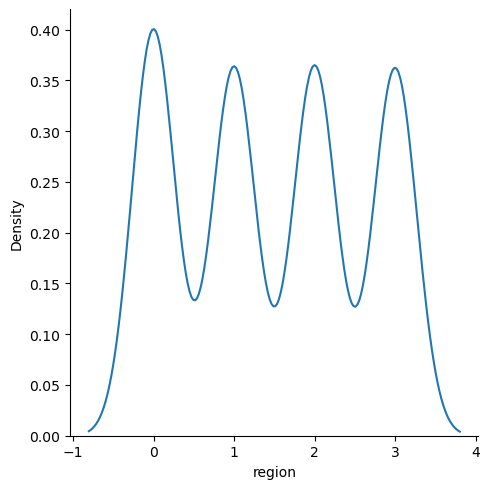

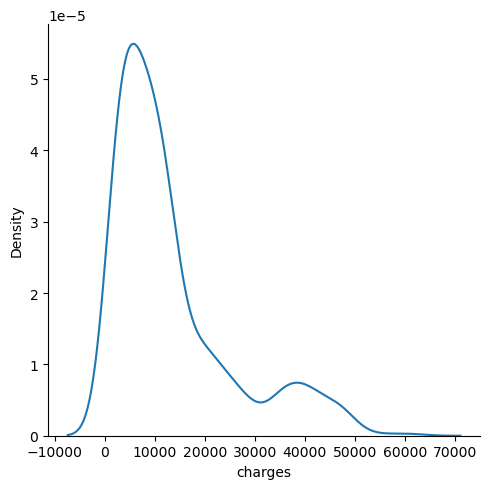

In [30]:
for i in df1.columns:
    sb.displot(df1[i],kind='kde')
    plt.xlabel(i)
    plt.show()

In [31]:
X = df1.drop(['charges'],axis=1)
X

,age,sex,bmi,children,smoker,region
0,19,0,27.900,0,1,1
1,18,1,33.770,1,0,0
2,28,1,33.000,3,0,0
3,33,1,22.705,0,0,2
4,32,1,28.880,0,0,2
...,...,...,...,...,...,...
1333,50,1,30.970,3,0,2
1334,18,0,31.920,0,0,3
1335,18,0,36.850,0,0,0
1336,21,0,25.800,0,0,1


In [32]:
Y = df1['charges']
Y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1329, dtype: float64

In [33]:
from sklearn.preprocessing import StandardScaler
stds=StandardScaler()
X=stds.fit_transform(X)

In [34]:
X

array([[-1.43876391, -1.00831144, -0.44566964, -0.90793956,  1.97586919,
        -0.40965663],
       [-1.50997605,  0.99175707,  0.54626664, -0.07976408, -0.50610638,
        -1.29635642],
       [-0.79785463,  0.99175707,  0.41614893,  1.57658687, -0.50610638,
        -1.29635642],
       ...,
       [-1.50997605, -1.00831144,  1.06673747, -0.90793956, -0.50610638,
        -1.29635642],
       [-1.29633963, -1.00831144, -0.80053612, -0.90793956, -0.50610638,
        -0.40965663],
       [ 1.55214607, -1.00831144, -0.24795832, -0.90793956,  1.97586919,
         0.47704315]])

In [35]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,train_size=0.7,random_state=0)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((930, 6), (399, 6), (930,), (399,))

# Linear Regression :
## Testing Data :

In [36]:
from sklearn.linear_model import LinearRegression
Lr = LinearRegression()
Lr.fit(X_train,Y_train)

print('The slofe values are = '+str(Lr.coef_))
print('The intercept is = '+str(Lr.intercept_))

The slofe values are = [3708.59659021   90.88784284 1864.67461286  586.7198617  9434.50759826
  448.23339912]
The intercept is = 13092.087821983449


In [37]:
Y_pre = Lr.predict(X_test)
Y_pre

array([ 4.15122936e+02,  7.42413802e+03,  3.16763716e+04,  3.67464744e+04,
        9.36525670e+03,  3.02003720e+04,  1.47003348e+04,  1.69586065e+04,
        1.09892210e+04,  1.10074953e+04,  3.70450527e+04,  1.39762781e+04,
        3.12576685e+04,  1.13488040e+04,  6.49707766e+03,  2.84542978e+04,
        1.18929391e+04,  6.11265273e+03,  1.50564103e+04,  3.31166607e+04,
        2.80531023e+04,  8.38514314e+01,  2.67714725e+03,  3.43352866e+03,
        3.78033688e+03,  1.39936484e+04,  1.37379426e+03,  1.82655911e+03,
        1.62735933e+04,  5.79572567e+03,  1.49401889e+04,  8.99256626e+03,
        1.92298732e+04,  3.94627099e+04,  1.00788209e+04, -1.02810170e+03,
        4.65619229e+03,  3.79592507e+04,  6.09812526e+03,  5.39939452e+03,
        1.43223308e+04,  3.60925242e+04,  1.47109353e+04,  1.26337293e+04,
        1.17899530e+04,  1.20381094e+04,  2.67190293e+04,  3.42019672e+03,
        3.83455383e+04,  9.61462926e+03,  6.09633146e+03,  1.26573889e+04,
        3.50011251e+04,  

In [38]:
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
mse = mean_squared_error(Y_test,Y_pre)
mae = mean_absolute_error(Y_test,Y_pre)
R2 = r2_score(Y_test,Y_pre)
rmse = (mse)**1/2
adR2 = 1-(1-R2)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

print('The mse is = '+str(mse))
print('The mae is = '+str(mae))
print('The R2 value is = '+str(R2))
print('The rmse is = '+str(rmse))
print('The adjusted R2 value is = '+str(adR2))



The mse is = 42718748.46261709
The mae is = 4507.869320887302
The R2 value is = 0.7432531156701725
The rmse is = 21359374.231308546
The adjusted R2 value is = 0.7393233164202262


In [39]:
T_Data = pd.DataFrame({'Actual Data':Y_test,'Predicted Data':Y_pre})
T_Data

,Actual Data,Predicted Data
1295,1964.7800,415.122936
448,5910.9440,7424.138019
461,22144.0320,31676.371576
252,44260.7499,36746.474434
1259,10197.7722,9365.256698
...,...,...
1164,7153.5539,8165.111277
197,8516.8290,9003.888866
741,18246.4955,27049.631285
184,7731.4271,9580.133171


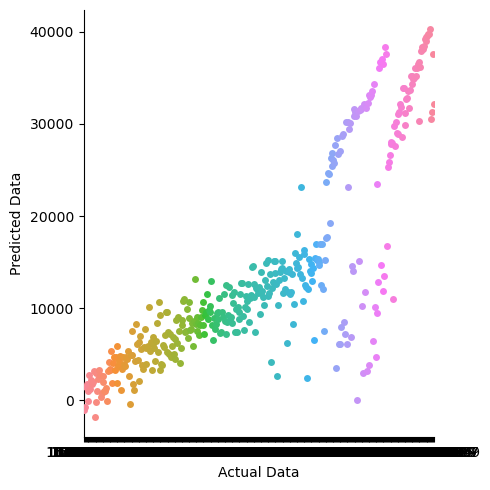

In [40]:
sb.catplot(x='Actual Data',y='Predicted Data',data=T_Data)

## Training Data :

In [41]:
Y_pre_tr = Lr.predict(X_train)
Y_pre_tr

array([ 1.36306980e+04,  1.04156573e+04,  3.05477673e+04,  5.46863007e+02,
        3.42895727e+04,  1.14027413e+04,  7.89083625e+03,  7.07650093e+03,
        1.22761661e+04,  3.91696223e+03,  9.60137262e+03,  4.05917083e+03,
        1.21074883e+04,  1.26455559e+04,  1.92167628e+03,  3.72010717e+04,
        1.17848133e+04,  1.46022316e+04, -6.15155449e+02,  3.07840885e+04,
        1.21818031e+04,  3.91538263e+03,  8.82008268e+03,  1.43146521e+04,
        9.66109167e+03,  1.50541365e+04,  9.04166838e+03,  1.16609629e+04,
        2.53594589e+04,  8.63786996e+03,  3.50545422e+04,  9.29161175e+03,
        2.48774075e+04,  3.47801912e+04,  4.81588006e+03,  1.29042252e+04,
        6.56836799e+03,  5.46594822e+03,  3.47592667e+04,  2.56838380e+03,
        6.59770458e+03,  1.39947766e+04,  7.87280515e+03,  6.74127771e+03,
        3.84264658e+03,  1.12795684e+04,  4.73124683e+03,  3.02128300e+03,
        6.96314796e+03,  1.11931593e+04,  5.39572196e+03,  2.63806875e+03,
        2.81608820e+03,  

In [42]:
mse1 = mean_squared_error(Y_train,Y_pre_tr)
mae1 = mean_absolute_error(Y_train,Y_pre_tr)
R21 = r2_score(Y_train,Y_pre_tr)
rmse1 = (mse1)**1/2
adR21 = 1-(1-R21)*(len(Y_train)-1)/(len(Y_train)-X_test.shape[1]-1)

print('The mse is = '+str(mse1))
print('The mae is = '+str(mae1))
print('The R2 value is = '+str(R21))
print('The rmse is = '+str(rmse1))
print('The adjusted R2 value is = '+str(adR21))


The mse is = 33178963.32283465
The mae is = 3924.0171989903806
The R2 value is = 0.7508463421337881
The rmse is = 16589481.661417324
The adjusted R2 value is = 0.749226708388179


# Ridger Regression :

In [43]:
from sklearn.linear_model import Ridge
rid = Ridge()
rid.fit(X_train,Y_train)

print('The slofes are = '+str(rid.coef_))
print('The intercept is = '+str(rid.intercept_))

The slofes are = [3704.43192855   91.46645768 1862.62271205  586.35655564 9423.53471973
  447.06699593]
The intercept is = 13091.577422763346


In [44]:
Y_pre_rid = rid.predict(X_test)
Y_pre_rid

array([ 4.29902247e+02,  7.42949424e+03,  3.16549188e+04,  3.67204355e+04,
        9.36721159e+03,  3.01779923e+04,  1.46963594e+04,  1.69540883e+04,
        1.09907986e+04,  1.10100027e+04,  3.70172159e+04,  1.39769906e+04,
        3.12347759e+04,  1.13505125e+04,  6.50248809e+03,  2.84352504e+04,
        1.18940547e+04,  6.12074572e+03,  1.50533943e+04,  3.30938211e+04,
        2.80345501e+04,  9.81466865e+01,  2.68800385e+03,  3.44392671e+03,
        3.79172252e+03,  1.39930434e+04,  1.38474565e+03,  1.83755554e+03,
        1.62710346e+04,  5.80392167e+03,  1.49387820e+04,  8.99630112e+03,
        1.92235631e+04,  3.94324644e+04,  1.00815996e+04, -1.01196211e+03,
        4.66484134e+03,  3.79307192e+04,  6.10512266e+03,  5.40647129e+03,
        1.43201352e+04,  3.60657553e+04,  1.47089905e+04,  1.26331521e+04,
        1.17892398e+04,  1.20370992e+04,  2.67040920e+04,  3.43022970e+03,
        3.83148434e+04,  9.61937018e+03,  6.10385148e+03,  1.26589975e+04,
        3.49768147e+04,  

In [45]:
mse2 = mean_squared_error(Y_test,Y_pre_rid)
mae2 = mean_absolute_error(Y_test,Y_pre_rid)
R22 = r2_score(Y_test,Y_pre_rid)
rmse2 = (mse2)**1/2
adR22 = 1-(1-R22)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

print('The mse is = '+str(mse2))
print('The mae is = '+str(mae2))
print('The R2 value is = '+str(R22))
print('The rmse is = '+str(rmse2))
print('The adjusted R2 value is = '+str(adR22))

The mse is = 42725271.01772802
The mae is = 4509.16109905964
The R2 value is = 0.7432139140136897
The rmse is = 21362635.50886401
The adjusted R2 value is = 0.7392835147383892


In [46]:
Ri_Data = pd.DataFrame({'Actual Data':Y_test,'Predicted Data':Y_pre_rid})
Ri_Data

,Actual Data,Predicted Data
1295,1964.7800,429.902247
448,5910.9440,7429.494240
461,22144.0320,31654.918806
252,44260.7499,36720.435487
1259,10197.7722,9367.211587
...,...,...
1164,7153.5539,8169.283085
197,8516.8290,9008.541440
741,18246.4955,27033.956109
184,7731.4271,9585.514905


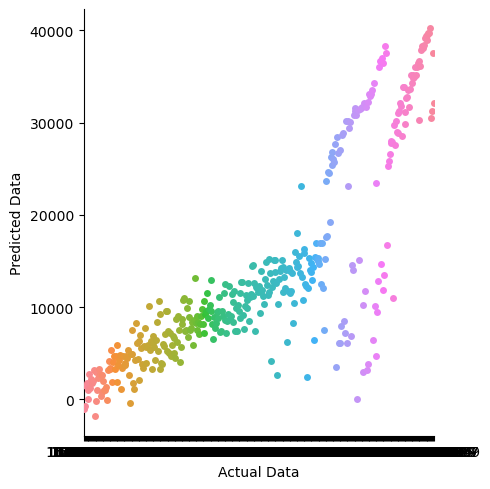

In [47]:
sb.catplot(x='Actual Data',y='Predicted Data',data=Ri_Data)

# Lasso Regression :

In [48]:
from sklearn.linear_model import Lasso
lass = Lasso()
lass.fit(X_train,Y_train)

print('The slofes are = '+str(lass.coef_))
print('The intercept is = '+str(lass.intercept_))

The slofes are = [3707.72132283   90.02110847 1863.47109455  585.83110803 9433.42499228
  446.94186188]
The intercept is = 13092.019839327206


In [49]:
Y_pre_lass = lass.predict(X_test)
Y_pre_lass

array([ 4.18276515e+02,  7.42696892e+03,  3.16745759e+04,  3.67427478e+04,
        9.36635491e+03,  3.01993678e+04,  1.46990709e+04,  1.69553737e+04,
        1.09909503e+04,  1.10075166e+04,  3.70405352e+04,  1.39745072e+04,
        3.12558975e+04,  1.13482189e+04,  6.49841526e+03,  2.84518313e+04,
        1.18918946e+04,  6.11179098e+03,  1.50534084e+04,  3.31141618e+04,
        2.80499216e+04,  8.70769472e+01,  2.67759404e+03,  3.43885076e+03,
        3.78360269e+03,  1.39922448e+04,  1.37637409e+03,  1.83070854e+03,
        1.62723638e+04,  5.79570716e+03,  1.49376438e+04,  8.99222890e+03,
        1.92237991e+04,  3.94558853e+04,  1.00770956e+04, -1.02370232e+03,
        4.65590238e+03,  3.79523152e+04,  6.09825041e+03,  5.40102167e+03,
        1.43197428e+04,  3.60841848e+04,  1.47115837e+04,  1.26327618e+04,
        1.17894863e+04,  1.20379149e+04,  2.67164729e+04,  3.42027205e+03,
        3.83389828e+04,  9.61412594e+03,  6.09448344e+03,  1.26548237e+04,
        3.49981905e+04,  

In [50]:
mse3 = mean_squared_error(Y_test,Y_pre_lass)
mae3 = mean_absolute_error(Y_test,Y_pre_lass)
R23 = r2_score(Y_test,Y_pre_lass)
rmse3 = (mse3)**1/2
adR23 = 1-(1-R23)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

print('The mse is = '+str(mse3))
print('The mae is = '+str(mae3))
print('The R2 value is = '+str(R23))
print('The rmse is = '+str(rmse3))
print('The adjusted R2 value is = '+str(adR23))

The mse is = 42718910.916088566
The mae is = 4507.720743614915
The R2 value is = 0.7432521392974052
The rmse is = 21359455.458044283
The adjusted R2 value is = 0.7393223251029777


In [51]:
L_Data = pd.DataFrame({'Actual Data':Y_test,'Predicted Data':Y_pre_lass})
L_Data

,Actual Data,Predicted Data
1295,1964.7800,418.276515
448,5910.9440,7426.968923
461,22144.0320,31674.575941
252,44260.7499,36742.747750
1259,10197.7722,9366.354905
...,...,...
1164,7153.5539,8166.260956
197,8516.8290,9006.284615
741,18246.4955,27050.088670
184,7731.4271,9580.432667


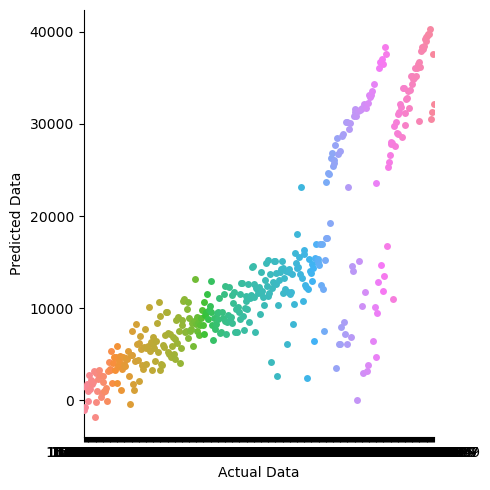

In [52]:
sb.catplot(x='Actual Data',y='Predicted Data',data=L_Data)

# ElasticNet Regression :

In [53]:
from sklearn.linear_model import ElasticNet
eln = ElasticNet()
eln.fit(X_train,Y_train)

print('The slofes are = '+str(eln.coef_))
print('The intercept is = '+str(eln.intercept_))

The slofes are = [2435.53817818  196.50465831 1244.97141913  447.35755763 6123.77890883
  161.66824213]
The intercept is = 12939.993440790195


In [54]:
Y_pre_eln = eln.predict(X_test)
Y_pre_eln

array([ 4806.86897848,  9111.04370675, 25134.16800727, 28698.77766524,
       10128.38331126, 23633.02627094, 13661.53373963, 15557.18342094,
       11494.06781734, 11732.09940625, 28587.82500592, 13974.21299784,
       24486.94042301, 11837.72258188,  8291.24314272, 22764.88194392,
       12203.90814376,  8508.96132941, 14168.03802683, 26124.53732797,
       22523.00736099,  4408.95002542,  6024.15907715,  6594.66555252,
        7103.64519478, 13725.59312296,  4890.96921591,  5289.28452214,
       15349.62134185,  8245.51701951, 14406.5184653 , 10174.42050969,
       17214.71580895, 30256.73352897, 10931.18855532,  3800.1018822 ,
        7331.05334943, 29281.80747293,  8279.45222051,  7680.50426233,
       13701.13567854, 27994.17631742, 14089.37264415, 12524.76474435,
       11747.25967188, 11901.39378497, 22069.25725248,  6517.37701534,
       29183.45938966, 10922.90479653,  8378.94199355, 12991.84467497,
       27507.61901469, 10714.57419326, 23911.64771009, 10608.3846413 ,
      

In [55]:
mse4 = mean_squared_error(Y_test,Y_pre_eln)
mae4 = mean_absolute_error(Y_test,Y_pre_eln)
R24 = r2_score(Y_test,Y_pre_eln)
rmse4 = (mse4)**1/2
adR24 = 1-(1-R24)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

print('The mse is = '+str(mse4))
print('The mae is = '+str(mae4))
print('The R2 value is = '+str(R24))
print('The rmse is = '+str(rmse4))
print('The adjusted R2 value is = '+str(adR24))

The mse is = 59254656.61195097
The mae is = 5381.328166390802
The R2 value is = 0.6438695183107852
The rmse is = 29627328.305975486
The adjusted R2 value is = 0.638418541550236


In [56]:
E_Data = pd.DataFrame({'Actual Data':Y_test,'Predicted Data':Y_pre_eln})
E_Data

,Actual Data,Predicted Data
1295,1964.7800,4806.868978
448,5910.9440,9111.043707
461,22144.0320,25134.168007
252,44260.7499,28698.777665
1259,10197.7722,10128.383311
...,...,...
1164,7153.5539,9526.934773
197,8516.8290,10365.492793
741,18246.4955,22210.395187
184,7731.4271,11024.770494


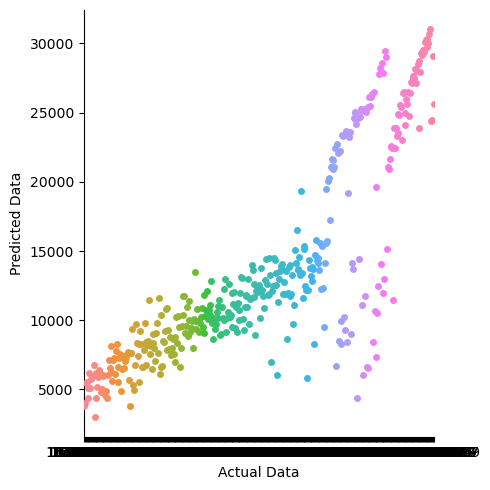

In [57]:
sb.catplot(x='Actual Data',y='Predicted Data',data=E_Data)

# RandomForestRegressor :
## Testing Data :

In [58]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor()
rfr.fit(X_train,Y_train)

RandomForestRegressor()

In [59]:
Y_pre_rfr = rfr.predict(X_test)
Y_pre_rfr

array([ 2977.3591031 ,  6001.8610365 , 32670.2141127 , 44875.701594  ,
       14659.724686  , 23880.8256308 , 14115.7073544 , 14714.1391688 ,
       11423.9244273 ,  8275.362747  , 28494.0037378 , 16864.086671  ,
       37779.3146727 , 11538.062602  ,  8126.6026513 , 19910.8418699 ,
       17153.0622108 ,  6536.0962182 , 15507.6542254 , 24629.2485258 ,
       34098.7690473 ,  2172.532673  ,  2666.4230459 ,  3885.1968364 ,
        3484.9008374 , 11680.0406465 ,  3083.22987528,  3209.9864075 ,
       13514.2271693 ,  4395.8302502 , 11521.3031037 ,  8051.4034775 ,
       17507.4182637 , 47356.7370921 ,  9694.0877629 ,  1261.823517  ,
        4102.96795397, 46226.4423228 ,  5872.6606114 ,  4677.3476636 ,
       11516.9126054 , 48515.2409628 , 14831.6927924 , 15493.5040943 ,
       12727.5291473 , 11612.081675  , 16975.4801105 ,  2362.56373407,
       44534.2664131 , 10747.9174745 ,  6288.6017045 ,  9797.4237355 ,
       42037.741828  , 10511.9309315 , 37698.5668215 ,  8291.6197469 ,
      

In [60]:
mse5 = mean_squared_error(Y_test,Y_pre_rfr)
mae5 = mean_absolute_error(Y_test,Y_pre_rfr)
R25 = r2_score(Y_test,Y_pre_rfr)
rmse5 = (mse5)**1/2
adR25 = 1-(1-R25)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

print('The mse is = '+str(mse5))
print('The mae is = '+str(mae5))
print('The R2 value is = '+str(R25))
print('The rmse is = '+str(rmse5))
print('The adjusted R2 value is = '+str(adR25))

The mse is = 25718667.818937365
The mae is = 2750.0637393801007
The R2 value is = 0.8454264680201393
The rmse is = 12859333.909468682
The adjusted R2 value is = 0.8430605466122842


In [61]:
R_Data = pd.DataFrame({'Y Test':Y_test,'Linear Regression':Y_pre,'Random Forest Regressor':Y_pre_rfr})
R_Data

,Y Test,Linear Regression,Random Forest Regressor
1295,1964.7800,415.122936,2977.359103
448,5910.9440,7424.138019,6001.861036
461,22144.0320,31676.371576,32670.214113
252,44260.7499,36746.474434,44875.701594
1259,10197.7722,9365.256698,14659.724686
...,...,...,...
1164,7153.5539,8165.111277,6773.628573
197,8516.8290,9003.888866,11178.874679
741,18246.4955,27049.631285,18961.718361
184,7731.4271,9580.133171,9241.445472


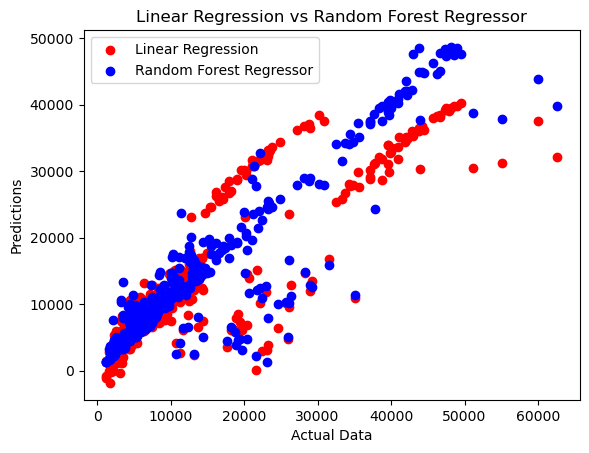

In [62]:
plt.scatter(R_Data['Y Test'],R_Data['Linear Regression'],c='red',label='Linear Regression')
plt.scatter(R_Data['Y Test'],R_Data['Random Forest Regressor'],c='blue',label='Random Forest Regressor')

plt.xlabel('Actual Data')
plt.ylabel('Predictions')
plt.title('Linear Regression vs Random Forest Regressor')
plt.legend()
plt.show()

## Training Data :

In [63]:
Y_pre_rfr_tr = rfr.predict(X_train)
Y_pre_rfr_tr

array([12627.3071724 ,  9087.9646501 , 20694.6477039 ,  2649.645442  ,
       25147.6430932 , 13232.592989  ,  6594.8444398 ,  4180.316535  ,
        9149.4317199 ,  3185.94647038,  8299.6117431 ,  1963.3900766 ,
       14871.7783553 ,  8895.8617324 ,  3370.9124364 , 44045.875137  ,
       15308.2707234 , 13770.6853055 ,  1158.508274  , 21017.970915  ,
       11901.8695564 ,  4612.757486  , 10350.2949794 ,  8867.9380299 ,
        6955.9180745 , 15769.2860091 ,  7175.9188862 , 11660.3459227 ,
       17690.1434735 ,  9079.6512516 , 43582.0763209 , 10533.8525024 ,
       16486.359459  , 24632.4614817 ,  7527.46245   , 10330.1597713 ,
        4414.454935  ,  6841.1044103 , 25083.5849035 , 12194.5473923 ,
        2325.4818419 , 12681.8151881 ,  8515.2955606 ,  4678.6696631 ,
        3211.9649569 , 20230.6029897 ,  6298.0509188 ,  3623.7417495 ,
        7033.936425  , 21020.581241  ,  4384.0406983 , 10111.7391197 ,
        2988.3013825 ,  9923.6707638 , 38102.6517318 , 18993.122592  ,
      

In [64]:
mse6 = mean_squared_error(Y_train,Y_pre_rfr_tr)
mae6 = mean_absolute_error(Y_train,Y_pre_rfr_tr)
R26 = r2_score(Y_train,Y_pre_rfr_tr)
rmse6 = (mse6)**1/2
adR26 = 1-(1-R26)*(len(Y_train)-1)/(len(Y_train)-X_test.shape[1]-1)

print('The mse is = '+str(mse6))
print('The mae is = '+str(mae6))
print('The R2 value is = '+str(R26))
print('The rmse is = '+str(rmse6))
print('The adjusted R2 value is = '+str(adR26))

The mse is = 3254003.5234656297
The mae is = 966.3754396779856
The R2 value is = 0.9755644300066776
The rmse is = 1627001.7617328148
The adjusted R2 value is = 0.9754055855646842


# GridSearchCV :

In [65]:
from sklearn.model_selection import GridSearchCV

In [66]:
Grid_Prm_R = {'criterion':['squared_error','absolute_error','poisson'],
              'max_depth':range(1,5,1),
              'min_samples_split':range(2,5,1),
              'min_samples_leaf':range(1,5,1),
              'ccp_alpha':np.random.rand(20)}

In [68]:
Gscv1 = GridSearchCV(estimator=rfr,param_grid=Grid_Prm_R,cv=10,n_jobs=1)
Gscv1.fit(X_train,Y_train)
Gscv1.best_params_

{'ccp_alpha': 0.8295999805572069,
 'criterion': 'squared_error',
 'max_depth': 4,
 'min_samples_leaf': 3,
 'min_samples_split': 4}

## Testing

In [67]:
rfr2=RandomForestRegressor(criterion='squared_error',max_depth=4,min_samples_leaf=3,min_samples_split=4,ccp_alpha=0.8295999805572069)
rfr2.fit(X_train,Y_train)
Y_pre_rfr2=rfr2.predict(X_test)

In [68]:
Y_pre_rfr2

array([ 5152.33474583,  6110.67197826, 27150.25361576, 45038.83426232,
       13086.68498743, 24916.10571501, 14067.25029373, 14221.24282493,
       12976.44620305,  7305.08989351, 27145.44637388, 14470.47630086,
       39840.89871145, 12955.01717071,  8062.79608601, 19303.92194433,
       12928.26036918,  5922.25081518, 14067.25029373, 26377.83757283,
       35764.06826797,  2703.40558036,  2764.32937567,  4111.74379772,
        4051.65546767, 12928.26036918,  2791.8112905 ,  4127.75541982,
       14147.87875285,  5815.4722071 , 12988.17192134,  7135.85443266,
       16917.95274794, 46541.54952183, 10887.30937926,  2703.40558036,
        4281.83373202, 44036.74453105,  5922.25081518,  4135.0732386 ,
       11599.74047338, 41674.5183873 , 13584.92166171, 14211.55259014,
       13132.46176695, 12971.21952398, 17599.56893462,  2764.32937567,
       45159.48207683, 10354.38200218,  6833.80399339, 10558.07796861,
       42787.10673896,  9891.45625622, 39375.14803726,  9399.49111536,
      

In [69]:
rfr2.score(X_test,Y_test)

0.8669183581179647

In [70]:
rfr2.score(X_train,Y_train)

0.8725757159780797

In [71]:
mse10=mean_squared_error(Y_test,Y_pre_rfr2)
mae10=mean_absolute_error(Y_test,Y_pre_rfr2)
rmse10=(mse10)**1/2
r210=r2_score(Y_test,Y_pre_rfr2)
adjusted_r210=1-(1-r210)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

print('mse value is = '+str(mse10))
print('mae vlaue is = '+str(mae10))
print('the r2 value is = '+str(r210))
print('adjusted r2 value is = '+str(adjusted_r210))



mse value is = 22142746.53961318
mae vlaue is = 2686.508892363554
the r2 value is = 0.8669183581179647
adjusted r2 value is = 0.864881394211607


## Training 

In [72]:
Y_pre_rfr_tr2=rfr2.predict(X_train)
Y_pre_rfr_tr2

array([14473.93941539,  9340.39664755, 19577.09596444,  4085.44067734,
       26088.77781898, 14439.03481705,  6600.38017881,  5494.45634703,
       10223.68124966,  2760.55315049, 10030.66800328,  2718.23840801,
       13723.22257834, 10240.23536535,  4127.75541982, 44430.27470514,
       14051.04794047, 14051.04794047,  2703.40558036, 19610.32502142,
       14167.91530942,  5749.8534582 , 10302.92578848, 10503.25678229,
        6984.65936009, 15809.09828949,  9083.53723972, 13053.81536298,
       17622.67030174, 10397.86993179, 43645.10073223, 10257.86850838,
       17617.39263647, 24360.94556426,  7888.89684077,  8004.21583466,
        5771.05574261,  6764.02957914, 24350.31712544,  3953.68448845,
        2847.61935591, 14053.84142478,  9365.58288996,  5922.25081518,
        4281.83373202, 12992.64855632,  5848.89983972,  5749.8534582 ,
        6805.52867149, 12810.51480616,  5815.4722071 ,  2718.23840801,
        2760.55315049, 11056.47803509, 36886.61877347, 19340.12967813,
      

In [73]:
mse10t=mean_squared_error(Y_train,Y_pre_rfr_tr2)
mae10t=mean_absolute_error(Y_train,Y_pre_rfr_tr2)
rmse10t=(mse10t)**1/2
r210t=r2_score(Y_train,Y_pre_rfr_tr2)
adjusted_r210t=1-(1-r210t)*(len(Y_train)-1)/(len(Y_train)-X_test.shape[1]-1)

print('mse value is = '+str(mse10t))
print('mae vlaue is = '+str(mae10t))
print('the r2 value is = '+str(r210t))
print('adjusted r2 value is = '+str(adjusted_r210t))


mse value is = 16968667.77798608
mae vlaue is = 2226.266170572307
the r2 value is = 0.8725757159780797
adjusted r2 value is = 0.8717473891046977


## Over fitting problem Before & After GridSearchCv 

In [74]:
rfr_df=pd.DataFrame({'Testing':[R25,r210],'Training':[R26,r210t]},index=['Before GridSearchCv','After GridSearchCv'])
rfr_df

,Testing,Training
Before GridSearchCv,0.845426,0.975564
After GridSearchCv,0.866918,0.872576


# DecisionTree :

In [75]:
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
Dt = DecisionTreeRegressor()
Dt.fit(X_train,Y_train)

DecisionTreeRegressor()

## Testing

In [76]:
Y_pre_Dt = Dt.predict(X_test)
Y_pre_Dt

array([11884.04858,  5920.1041 , 38245.59327, 47269.854  , 10942.13205,
       21771.3423 , 13844.7972 , 14410.9321 , 11073.176  ,  5124.1887 ,
       29141.3603 , 12363.547  , 37270.1512 , 10601.63225,  7077.1894 ,
       20149.3229 , 24476.47851,  4433.3877 , 13555.0049 , 25309.489  ,
       33475.81715,  2045.68525,  2102.2647 ,  3757.8448 ,  2689.4954 ,
       10601.412  ,  1708.92575,  3176.2877 , 13470.8044 ,  4239.89265,
       10601.412  ,  8017.06115, 15170.069  , 48549.17835,  9861.025  ,
        1242.26   ,  3070.8087 , 44202.6536 ,  4058.71245,  3201.24515,
       11085.5868 , 58571.07448, 12347.172  , 11150.78   , 10942.13205,
       11658.11505, 18223.4512 ,  2102.2647 , 48549.17835,  8615.3    ,
        4435.0942 ,  9620.3307 , 41676.0811 , 17929.30337, 37701.8768 ,
        7623.518  , 13880.949  , 11837.16   , 46130.5265 ,  3861.20965,
       12638.195  , 13352.0998 , 12479.70895, 13981.85035,  7623.518  ,
       20009.63365, 41661.602  ,  3392.3652 ,  6600.20595,  6875

In [77]:
Dt.score(X_test,Y_test)

0.7463163348596817

In [78]:
Dt.score(X_train,Y_train)

0.9978898113480282

In [79]:
mse11=mean_squared_error(Y_test,Y_pre_Dt)
mae11=mean_absolute_error(Y_test,Y_pre_Dt)
rmse11=(mse11)**1/2
r211=r2_score(Y_test,Y_pre_Dt)
ad_r211=1-(1-r211)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

print('mse value is = '+str(mse11))
print('mae vlaue is = '+str(mae11))
print('the r2 value is = '+str(r211))
print('adjusted r2 value is = '+str(ad_r211))


mse value is = 42209075.71475074
mae vlaue is = 3122.780688471178
the r2 value is = 0.7463163348596817
adjusted r2 value is = 0.7424334216177382


## Training

In [80]:
Y_pre_Dt2=Dt.predict(X_train)
Y_pre_Dt2

array([11289.10925 ,  8410.04685 , 20149.3229  ,  2680.9493  ,
       24915.22085 , 12479.70895 ,  6455.86265 ,  3935.1799  ,
        7935.29115 ,  1631.6683  ,  7441.053   ,  1532.4697  ,
       13112.6048  ,  7804.1605  ,  3176.8159  , 44641.1974  ,
       13451.122   , 13844.7972  ,  1121.8739  , 21472.4788  ,
       11253.421   ,  4529.477   ,  8026.6666  ,  8569.8618  ,
        6875.961   , 13919.8229  ,  6849.026   , 11554.2236  ,
       18223.4512  ,  8601.3293  , 42560.4304  ,  9788.8659  ,
       16297.846   , 24869.8368  ,  6640.54485 ,  6356.2707  ,
        4449.462   ,  6652.5288  , 25382.297   , 18955.22017 ,
        1837.2819  , 12269.68865 ,  7419.4779  ,  4433.3877  ,
        3070.8087  , 25517.11363 ,  4992.3764  ,  3484.331   ,
        7046.7222  , 27346.04207 ,  3956.07145 , 16586.49771 ,
        1880.07    ,  9855.1314  , 38511.6283  , 19361.9988  ,
       12523.6048  , 11881.9696  , 10825.2537  , 10796.35025 ,
        4296.2712  , 27533.9129  ,  3176.2877  ,  1515.

In [81]:
mse12=mean_squared_error(Y_train,Y_pre_Dt2)
mae12=mean_absolute_error(Y_train,Y_pre_Dt2)
rmse12=(mse12)**1/2
r212=r2_score(Y_train,Y_pre_Dt2)
ad_r212=1-(1-r212)*(len(Y_train)-1)/(len(Y_train)-X_test.shape[1]-1)

print('mse value is = '+str(mse12))
print('mae vlaue is = '+str(mae12))
print('the r2 value is = '+str(r212))
print('adjusted r2 value is = '+str(ad_r212))


mse value is = 281006.79912806785
mae vlaue is = 34.024291827956986
the r2 value is = 0.9978898113480282
adjusted r2 value is = 0.9978760939786763


# GridSearchCV :

In [82]:
from sklearn.model_selection import GridSearchCV

In [83]:
Grid_Prm = {'criterion':['squared_error', 'friedman_mse', 'absolute_error','poisson'],
              'splitter':['best','random'],
              'max_depth':range(1,5,1),
              'min_samples_split':range(2,5,1),
              'min_samples_leaf':range(1,5,1),
              'ccp_alpha':np.random.rand(20)}

In [117]:
Gscv = GridSearchCV(estimator=Dt,param_grid=Grid_Prm,cv=10,n_jobs=1)
Gscv.fit(X_train,Y_train)
Gscv.best_params_

{'ccp_alpha': 0.9199843392908559,
 'criterion': 'squared_error',
 'max_depth': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'splitter': 'best'}

In [84]:
Dt1 = DecisionTreeRegressor(criterion='squared_error',
                            splitter='best',
                            max_depth=3,
                            min_samples_split=2,
                            min_samples_leaf=1,
                            ccp_alpha=0.9199843392908559)

In [85]:
Dt1.fit(X_train,Y_train)

DecisionTreeRegressor(ccp_alpha=0.9199843392908559, max_depth=3)

## Testing

In [86]:
Y_pre_Dt1 = Dt1.predict(X_test)
Y_pre_Dt1

array([ 6490.68553095,  3516.88674635, 25327.91953765, 44785.15225854,
       13852.32856527, 25327.91953765, 13852.32856527, 13852.32856527,
       13852.32856527,  6490.68553095, 25327.91953765, 13852.32856527,
       37672.82486184, 13852.32856527,  6490.68553095, 18601.80860154,
       13852.32856527,  6490.68553095, 13852.32856527, 25327.91953765,
       37672.82486184,  3516.88674635,  3516.88674635,  3516.88674635,
        3516.88674635, 13852.32856527,  3516.88674635,  3516.88674635,
       13852.32856527,  6490.68553095, 13852.32856527,  6490.68553095,
       13852.32856527, 44785.15225854, 10381.18277657,  3516.88674635,
        3516.88674635, 44785.15225854,  6490.68553095,  3516.88674635,
       10381.18277657, 37672.82486184, 13852.32856527, 13852.32856527,
       13852.32856527, 13852.32856527, 18601.80860154,  3516.88674635,
       44785.15225854, 10381.18277657,  6490.68553095, 10381.18277657,
       44785.15225854, 10381.18277657, 37672.82486184, 10381.18277657,
      

In [87]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [88]:
mse13=mean_squared_error(Y_test,Y_pre_Dt1)
mae13=mean_absolute_error(Y_test,Y_pre_Dt1)
rmse13=(mse13)**1/2
r213=r2_score(Y_test,Y_pre_Dt1)
ad_r213=1-(1-r213)*(len(Y_test)-1)/(len(Y_test)-X_test.shape[1]-1)

print('mse value is = '+str(mse13))
print('mae vlaue is = '+str(mae13))
print('the r2 value is = '+str(r213))
print('adjusted r2 value is = '+str(ad_r213))



mse value is = 23911491.811470434
mae vlaue is = 3037.1792308691324
the r2 value is = 0.8562879006709292
adjusted r2 value is = 0.8540882256811986


In [89]:
Dt1.score(X_test,Y_test)

0.8562879006709292

In [90]:
Dt1.score(X_train,Y_train)

0.85447763825412

## Training

In [91]:
Y_pre_Dt2t=Dt1.predict(X_train)
Y_pre_Dt2t

array([13852.32856527, 10381.18277657, 18601.80860154,  3516.88674635,
       25327.91953765, 13852.32856527,  6490.68553095,  3516.88674635,
       10381.18277657,  3516.88674635, 10381.18277657,  3516.88674635,
       13852.32856527, 10381.18277657,  3516.88674635, 44785.15225854,
       13852.32856527, 13852.32856527,  3516.88674635, 18601.80860154,
       13852.32856527,  6490.68553095, 10381.18277657, 10381.18277657,
        6490.68553095, 13852.32856527, 10381.18277657, 13852.32856527,
       18601.80860154, 10381.18277657, 44785.15225854, 10381.18277657,
       18601.80860154, 25327.91953765,  6490.68553095,  6490.68553095,
        6490.68553095,  6490.68553095, 25327.91953765,  3516.88674635,
        3516.88674635, 13852.32856527, 10381.18277657,  6490.68553095,
        3516.88674635, 13852.32856527,  3516.88674635,  6490.68553095,
        6490.68553095, 13852.32856527,  6490.68553095,  3516.88674635,
        3516.88674635, 10381.18277657, 37672.82486184, 18601.80860154,
      

In [92]:
mse14=mean_squared_error(Y_train,Y_pre_Dt2t)
mae14=mean_absolute_error(Y_train,Y_pre_Dt2t)
rmse14=(mse14)**1/2
r214=r2_score(Y_train,Y_pre_Dt2t)
ad_r214=1-(1-r214)*(len(Y_train)-1)/(len(Y_train)-X_test.shape[1]-1)

print('mse value is = '+str(mse14))
print('mae vlaue is = '+str(mae14))
print('the r2 value is = '+str(r214))
print('adjusted r2 value is = '+str(ad_r214))


mse value is = 19378728.5499596
mae vlaue is = 2606.3571521447543
the r2 value is = 0.85447763825412
adjusted r2 value is = 0.85353166407159


## Over fitting problem Before & After GridSearchCv

In [93]:
Dt_df=pd.DataFrame({'Testing':[r211,r213],'Training':[r212,r214]},index=['Before GridSearchCv','After GridSearchCv'])
Dt_df

,Testing,Training
Before GridSearchCv,0.746316,0.997890
After GridSearchCv,0.856288,0.854478


## Comparison 

In [94]:
Com_df=pd.DataFrame({'Actual':Y_test,'Linear Regression':Y_pre,'DecisionTree':Y_pre_Dt1,'Random Forest':Y_pre_rfr2})
Com_df

,Actual,Linear Regression,DecisionTree,Random Forest
1295,1964.7800,415.122936,6490.685531,5152.334746
448,5910.9440,7424.138019,3516.886746,6110.671978
461,22144.0320,31676.371576,25327.919538,27150.253616
252,44260.7499,36746.474434,44785.152259,45038.834262
1259,10197.7722,9365.256698,13852.328565,13086.684987
...,...,...,...,...
1164,7153.5539,8165.111277,6490.685531,6977.926028
197,8516.8290,9003.888866,10381.182777,10354.382002
741,18246.4955,27049.631285,18601.808602,19279.240602
184,7731.4271,9580.133171,10381.182777,9617.692082
